# Target: 
Find the customers who falls in cluster : 2 

In [1]:
# importing required libraries:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting only customer related data because keeping whole purchase data will lead to bias. 
path = "/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/rfm_clustered_df.xlsx"
df = pd.read_excel(path).drop_duplicates(subset=['customer_id'])  # drop duplicate customers

df.columns

Index(['Unnamed: 0', 'transaction_id', 'product_id', 'customer_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'full_name', 'address', 'postcode', 'state',
       'country', 'property_valuation', 'Recency', 'Frequency', 'Monetary',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'Cluster'],
      dtype='object')

In [4]:
ndf = pd.read_excel("/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/cleaned_new_customer_data.xlsx")

ndf.columns

Index(['Unnamed: 0', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'Rank', 'Value', 'full_name'],
      dtype='object')

---

### Working with post codes:

In [5]:
australian_postcodes_file_path = '/home/omkar/Omkar Pawar/Data Science/KPMG Virtual Internship/Data/australian_postcodes.csv'
australian_postcodes = pd.read_csv(australian_postcodes_file_path)
australian_postcodes.head()

,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,MMM_2019,ced,altitude,chargezone,phn_code,phn_name,lgaregion,lgacode,electorate,electoraterating
0,230,200,ANU,ACT,149.11900,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,1.0,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN
1,21820,200,Australian National University,ACT,149.11890,-35.277700,NaN,NaN,Updated 3-Dec-2022,NaN,...,1.0,NaN,NaN,N2,NaN,NaN,Unincorporated ACT,89399.0,Durack,NaN
2,232,800,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan
3,24049,800,DARWIN CITY,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,2.0,NaN,NaN,NT1,PHN701,Northern Territory,Darwin Waterfront Precinct,71150.0,Solomon,Inner Metropolitan
4,233,801,DARWIN,NT,130.83668,-12.458684,NaN,NaN,Updated 3-Dec-2022,70101.0,...,2.0,NaN,NaN,NT1,PHN701,NaN,Darwin Waterfront Precinct,71150.0,Lingiari,Rural


In [6]:
# Specify the columns you want to keep
# selected_columns = ['postcode', 'SA3_CODE_2016', 'SA3_NAME_2016', 'SA4_CODE_2016', 'SA4_NAME_2016']
selected_columns = ['postcode', 'SA4_CODE_2016', 'SA4_NAME_2016']
# Create a new DataFrame with only the selected columns
au_postcode_data = australian_postcodes[selected_columns]


In [7]:
au_postcode_data.dropna(inplace=True) # only 9 null values found 

In [8]:
au_postcode_data = au_postcode_data.drop_duplicates(subset='postcode')

In [9]:
au_postcode_data

,postcode,SA4_CODE_2016,SA4_NAME_2016
0,200,801.0,Australian Capital Territory
2,800,701.0,Darwin
4,801,701.0,Darwin
6,804,701.0,Darwin
7,810,701.0,Darwin
...,...,...,...
18508,9013,305.0,Brisbane Inner City
18509,9015,305.0,Brisbane Inner City
18510,9464,302.0,Brisbane - North
18511,9726,309.0,Gold Coast


In [10]:
# Merge based on the 'postcode' column

df = pd.merge(df, au_postcode_data , how='inner', on='postcode')

df.drop(labels='Unnamed: 0', inplace=True, axis=1)

df


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,Cluster,SA4_CODE_2016,SA4_NAME_2016
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,...,75,3,1953.15,2,1,1,211,3,210.0,Melbourne - North West
1,200,57,2889,2017-04-15,1,Approved,WeareA2B,Touring,medium,large,...,105,5,6098.48,1,2,3,123,0,210.0,Melbourne - North West
2,293,0,314,2017-11-19,0,Approved,OHM Cycles,Standard,high,medium,...,20,8,6264.73,3,4,3,343,0,210.0,Melbourne - North West
3,710,5,437,2017-07-29,0,Approved,Trek Bicycles,Mountain,low,medium,...,48,6,5595.76,2,3,2,232,0,210.0,Melbourne - North West
4,972,5,316,2017-12-17,1,Approved,Trek Bicycles,Mountain,low,medium,...,11,4,3813.84,4,1,1,411,3,210.0,Melbourne - North West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481,13152,90,2239,2017-11-28,1,Approved,Solex,Standard,low,medium,...,32,2,1693.21,3,1,1,311,3,110.0,New England and North West
3482,14554,54,2352,2017-11-24,1,Approved,WeareA2B,Standard,medium,medium,...,36,1,1292.84,3,1,1,311,3,208.0,Melbourne - Inner South
3483,15436,95,3272,2017-03-10,1,Approved,Giant Bicycles,Standard,medium,large,...,295,1,569.56,1,1,1,111,1,216.0,Shepparton
3484,16662,75,1105,2017-05-08,0,Approved,Giant Bicycles,Touring,medium,large,...,16,2,3965.44,4,1,1,411,3,109.0,Murray


In [11]:
# Merge based on the 'postcode' column

ndf = pd.merge(ndf, au_postcode_data , how='inner', on='postcode')

ndf.drop(labels='Unnamed: 0', inplace=True, axis=1)

ndf


,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,full_name,SA4_CODE_2016,SA4_NAME_2016
0,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,Chickie Brister,314.0,Moreton Bay - South
1,Female,3,1975-03-13,Financial Analyst,Financial Services,Mass Customer,N,No,4,8350 Moulton Terrace,4500,QLD,Australia,4,120,1.26250,Peria Rantoull,314.0,Moreton Bay - South
2,Male,11,1967-01-19,Health Coach III,Health,Mass Customer,N,No,19,9503 New Castle Street,4500,QLD,Australia,9,620,0.75000,Madison Lars,314.0,Moreton Bay - South
3,Female,86,1938-08-05,Associate Professor,Financial Services,High Net Worth,N,Yes,13,31281 Meadow Valley Way,4500,QLD,Australia,6,760,0.63750,Andrea Pendle,314.0,Moreton Bay - South
4,Male,67,1966-03-03,Environmental Specialist,IT,Mass Customer,N,Yes,6,02643 Moose Court,4500,QLD,Australia,7,951,0.45050,Philbert Bangs,314.0,Moreton Bay - South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Female,83,1987-09-21,Research Nurse,Health,Mass Customer,N,No,15,9460 Monument Park,3277,VIC,Australia,4,985,0.40800,Lauralee Fudge,217.0,Warrnambool and South West
996,Male,38,1959-07-13,Compensation Analyst,Financial Services,Mass Customer,N,Yes,6,0535 Jay Point,2422,NSW,Australia,4,994,0.38250,Weidar Etheridge,108.0,Mid North Coast
997,Female,15,1990-07-02,Office Assistant IV,Retail,Mass Customer,N,No,3,6 Caliangt Way,3079,VIC,Australia,12,994,0.38250,Datha Fishburn,209.0,Melbourne - North East
998,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.35700,Melloney Temby,308.0,Central Queensland


------

In [12]:
df.columns 

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'full_name', 'address', 'postcode', 'state',
       'country', 'property_valuation', 'Recency', 'Frequency', 'Monetary',
       'R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'Cluster',
       'SA4_CODE_2016', 'SA4_NAME_2016'],
      dtype='object')

In [13]:
ndf.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value', 'full_name', 'SA4_CODE_2016',
       'SA4_NAME_2016'],
      dtype='object')

In [14]:
# finding the common features from both datasets:
common_features = set(df.columns) & set(ndf.columns)
print(common_features)

{'country', 'full_name', 'tenure', 'deceased_indicator', 'job_industry_category', 'wealth_segment', 'gender', 'owns_car', 'DOB', 'state', 'SA4_CODE_2016', 'address', 'SA4_NAME_2016', 'past_3_years_bike_related_purchases', 'job_title', 'postcode', 'property_valuation'}


In [15]:
common_features -= {'Unnamed: 0', 'job_title', 'country', 'postcode', 'SA4_CODE_2016', 'address', 'full_name'}

# too many job roles will not add any value we can get the actionable results by only using 'job_industry_category'
# our data is based on country Australia only so we can drop it. 
# rather than address we will use 'SA4_NAME_2016'
# full name don't add any value in our predictions. 

In [16]:
common_features = list(common_features)

In [17]:
df = df[common_features + ["Cluster"]]

In [18]:
ndf = ndf[common_features]

In [19]:
df.columns

Index(['tenure', 'deceased_indicator', 'job_industry_category',
       'wealth_segment', 'gender', 'owns_car', 'DOB', 'state', 'SA4_NAME_2016',
       'past_3_years_bike_related_purchases', 'property_valuation', 'Cluster'],
      dtype='object')

In [20]:
ndf.columns

Index(['tenure', 'deceased_indicator', 'job_industry_category',
       'wealth_segment', 'gender', 'owns_car', 'DOB', 'state', 'SA4_NAME_2016',
       'past_3_years_bike_related_purchases', 'property_valuation'],
      dtype='object')

------

### Feature Engineering

In [21]:
# old customer data:
# calculating age using DOB:
import datetime as dt

df['DOB'] = pd.to_datetime(df['DOB'])
current_year = dt.datetime.now().year

df['age'] = current_year - df['DOB'].dt.year

print(df['age'])

df.drop(labels='DOB', inplace= True, axis= 1)


0       68
1       37
2       61
3       47
4       47
        ..
3481    63
3482    52
3483    30
3484    33
3485    55
Name: age, Length: 3486, dtype: int32


In [22]:
# new customer data:
# calculating age using DOB:
import datetime as dt

ndf['DOB'] = pd.to_datetime(ndf['DOB'])
current_year = dt.datetime.now().year

ndf['age'] = current_year - ndf['DOB'].dt.year

print(ndf['age'])

ndf.drop(labels='DOB', inplace= True, axis= 1)


0      66
1      48
2      56
3      85
4      57
       ..
995    36
996    64
997    33
998    69
999    71
Name: age, Length: 1000, dtype: int32


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3486 entries, 0 to 3485
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   tenure                               3486 non-null   float64
 1   deceased_indicator                   3486 non-null   int64  
 2   job_industry_category                3486 non-null   object 
 3   wealth_segment                       3486 non-null   object 
 4   gender                               3486 non-null   object 
 5   owns_car                             3486 non-null   int64  
 6   state                                3486 non-null   object 
 7   SA4_NAME_2016                        3486 non-null   object 
 8   past_3_years_bike_related_purchases  3486 non-null   int64  
 9   property_valuation                   3486 non-null   int64  
 10  Cluster                              3486 non-null   int64  
 11  age                           

In [24]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   tenure                               1000 non-null   int64 
 1   deceased_indicator                   1000 non-null   object
 2   job_industry_category                1000 non-null   object
 3   wealth_segment                       1000 non-null   object
 4   gender                               1000 non-null   object
 5   owns_car                             1000 non-null   object
 6   state                                1000 non-null   object
 7   SA4_NAME_2016                        1000 non-null   object
 8   past_3_years_bike_related_purchases  1000 non-null   int64 
 9   property_valuation                   1000 non-null   int64 
 10  age                                  1000 non-null   int32 
dtypes: int32(1), int64(3), object(7)
memory usag

-----------

### Feature Selection:

In [25]:
numerical_features = df.columns[df.dtypes != 'object']
categorical_features = df.columns[df.dtypes == 'object']

print(f"Numerical columns: {numerical_features} \n-----------\ncategorical columns: {categorical_features}")

Numerical columns: Index(['tenure', 'deceased_indicator', 'owns_car',
       'past_3_years_bike_related_purchases', 'property_valuation', 'Cluster',
       'age'],
      dtype='object') 
-----------
categorical columns: Index(['job_industry_category', 'wealth_segment', 'gender', 'state',
       'SA4_NAME_2016'],
      dtype='object')


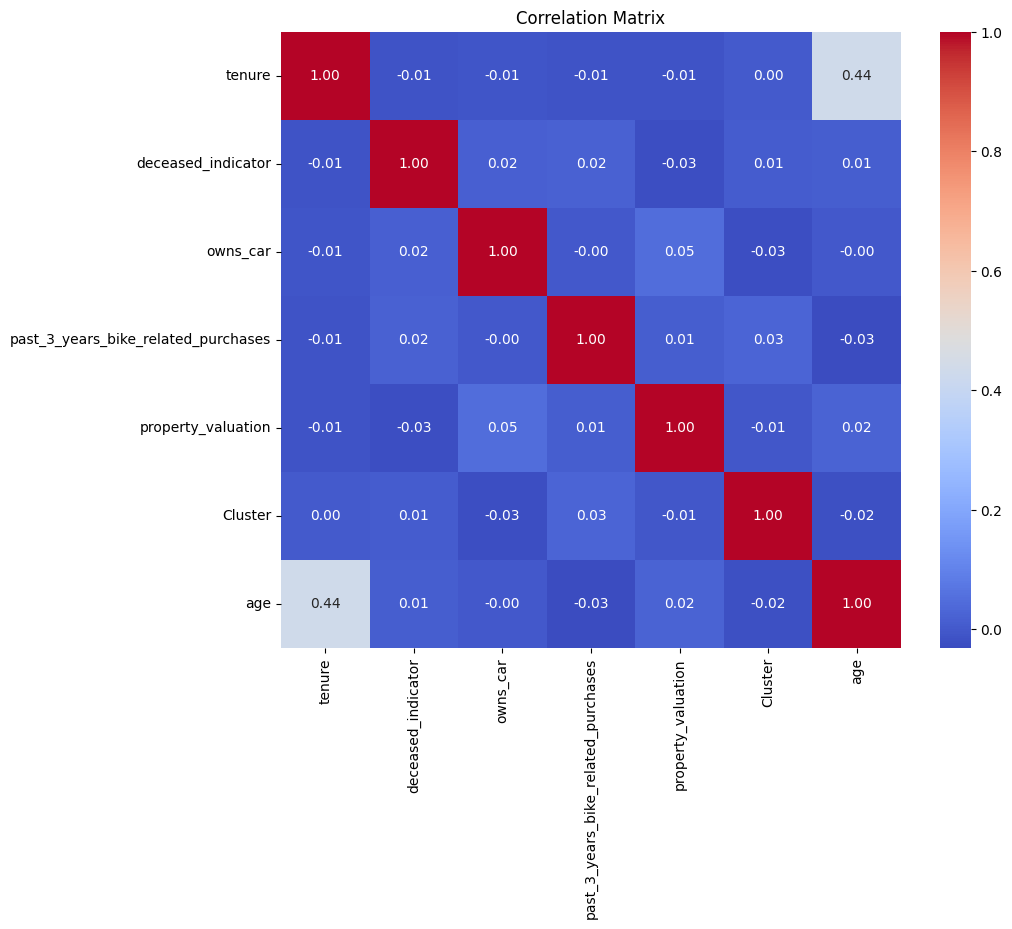

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with features
correlation_matrix = df[numerical_features].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

there is some positive correlation between two features: `age` and `tenure`

---------

### Understanding the relationship between categorical variables:

In [27]:
pd.crosstab(df['wealth_segment'], df['Cluster'])

Cluster,0,1,2,3
wealth_segment,,,,
Affluent Customer,310,124,157,259
High Net Worth,336,131,160,266
Mass Customer,640,241,323,539


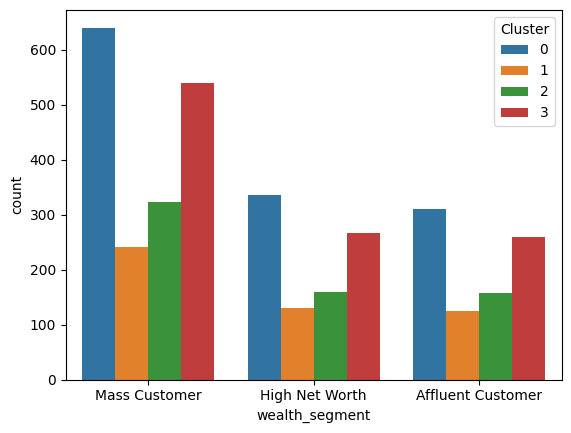

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='wealth_segment', hue='Cluster', data=df)
plt.show()


* mass customers are the people who are generating more profit. because they are the ones with more people in cluster 2

---

In [29]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency


def cramers_v_value(categorical_column):
    contingency_table = pd.crosstab(df[categorical_column], df['Cluster'])

    # Calculate Cramér's V
    chi2, _, _, _ = chi2_contingency(contingency_table)
    num_obs = contingency_table.sum().sum()
    cramers_v_value = np.sqrt(chi2 / (num_obs * (min(contingency_table.shape) - 1)))

    print(f"Cramér's V for {categorical_column} vs. Cluster: {cramers_v_value}")


for i in categorical_features:
    cramers_v_value(i)

Cramér's V for job_industry_category vs. Cluster: 0.05121253249095396
Cramér's V for wealth_segment vs. Cluster: 0.011749658723615889
Cramér's V for gender vs. Cluster: 0.029751314179611615
Cramér's V for state vs. Cluster: 0.01672942426769226
Cramér's V for SA4_NAME_2016 vs. Cluster: 0.13401498685385535


- Postcode vs. Cluster:

Cramér's V is relatively high at approximately 0.4911. This suggests a moderate association between 'Postcode' and 'Cluster,' indicating that certain clusters may be geographically related.

In [21]:
pd.crosstab(df['postcode'], df['Cluster'])

Cluster,0,1,2,3
postcode,,,,
2000,2,1,1,3
2007,0,1,1,0
2008,1,0,0,0
2009,3,0,1,0
2010,3,3,2,4
...,...,...,...,...
4873,1,1,0,1
4877,0,0,1,0
4878,0,1,0,2


In [22]:
cross_tab_result = pd.crosstab(df['postcode'], df['Cluster'])
cross_tab_result_sorted = cross_tab_result.sum(axis=1).sort_values(ascending=False)
print(cross_tab_result_sorted)

postcode
2170    28
2153    28
2145    27
2155    26
2770    24
        ..
3623     1
3621     1
2549     1
3618     1
4883     1
Length: 835, dtype: int64


In [23]:
# for cluster 2
cross_tab_result = pd.crosstab(df['postcode'], df['Cluster'])
cross_tab_result_cluster2_sorted = cross_tab_result[2].sort_values(ascending=False)
print(cross_tab_result_cluster2_sorted)

postcode
2763    6
2153    6
4300    5
2118    5
2036    5
       ..
3161    0
3160    0
3158    0
2305    0
3057    0
Name: 2, Length: 835, dtype: int64


---------

In [24]:
# slit df as train and test
# ues model on ndf and make predictions

In [28]:
numerical_features

Index(['deceased_indicator', 'past_3_years_bike_related_purchases',
       'property_valuation', 'owns_car', 'tenure', 'Cluster', 'age'],
      dtype='object')

------------

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assume X contains your features and y is your target variable 'Cluster'
X = df.drop('Cluster', axis=1)
y = df['Cluster']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier (you can choose another algorithm)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model (optional)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


ValueError: could not convert string to float: 'Manufacturing'